In [1]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade pandas


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade pandas-datareader


Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [5]:
start = '2010-01-01'
end = '2019-12-31'

#Scraping the data from yahoo finance website
df = data.DataReader('AAPL','yahoo', start, end)

df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434926
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535084
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546384
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430344


In [6]:
df.tail()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,69.835602
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.221161
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.194130
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.616669
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.139938


In [7]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434926
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535084
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546384
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430344


In [8]:
df = df.drop(['Date','Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


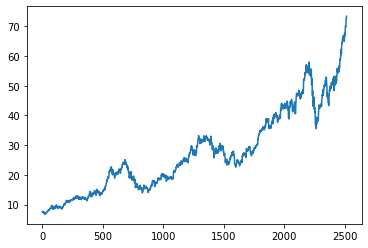

In [9]:
plt.plot(df.Close)

In [10]:
df

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...
2512,71.222504,70.730003,71.172501,71.067497,48478800.0
2513,72.495003,71.175003,71.205002,72.477501,93121200.0
2514,73.492500,72.029999,72.779999,72.449997,146266000.0
2515,73.172501,71.305000,72.364998,72.879997,144114400.0


In [11]:
#Calculating the 100 days moving average(the averages of a time frame) so the firsr 100 days(so it will take the 100 days closing price and will find the average) it will be null 
ma_100 = df.Close.rolling(100).mean()
ma_100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    59.401700
2513    59.643125
2514    59.875125
2515    60.106325
2516    60.331875
Name: Close, Length: 2517, dtype: float64

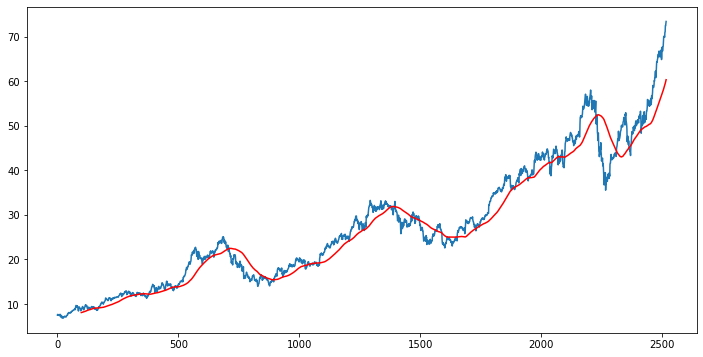

In [12]:
#Plotting the graph for 100 days moving average 
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma_100,'r')

In [13]:
#Calculating the 200 days moving average so the firsr 100 days it will be null 
ma_200 = df.Close.rolling(200).mean()
ma_200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    54.261513
2513    54.396763
2514    54.529350
2515    54.661100
2516    54.793137
Name: Close, Length: 2517, dtype: float64

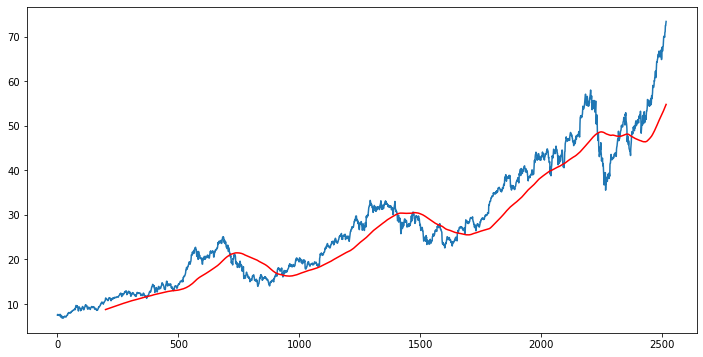

In [14]:
#Plotting the graph for 200 days moving average 
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma_200,'r')

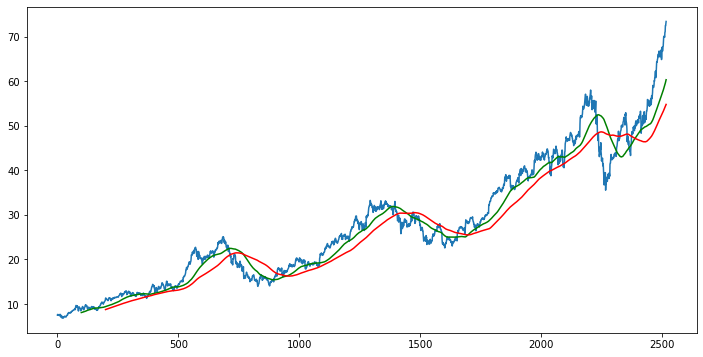

In [15]:
#Plotting the combined graph of 100 and 200 days moving average 
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma_100,'g')
plt.plot(ma_200,'r')

In [16]:
df.shape

(2517, 5)

In [17]:
#The main data will be the closing column

In [18]:
#Splitting the data into 70% training data and 30% testing data
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)


(1761, 1)
(756, 1)


In [19]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [20]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [21]:
#for stack LSTM model we have scale down the data 
#we will scale the data between 0 and 1

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [22]:
#Fitting the datas 
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [23]:
#Divide the data into x train and y train 
#the next days price will be totally dependent on the previous days data and when again the next days data will be calculated the first days data will be deducted so like this the whole process will carry on  
x_train = [] #previous days data (featured class)
y_train = [] #next days data (predicted class)

#here the steps are starting from 100 

for i in range(100,data_training.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
    
x_train, y_train = np.array(x_train),np.array(y_train)

In [24]:
#Building the Machine Learning Model

In [25]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [26]:
#The 4 layers of the LSTM Model

In [27]:
#FIRST LAYER
model = Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
               input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

#SECOND LAYER
model = Sequential()
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

#THIRD LAYER
model = Sequential()
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

#LAST LAYER
model = Sequential()
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

Metal device set to: Apple M1


2022-06-29 20:51:23.026414: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-29 20:51:23.027337: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [28]:
#For loss mean squared error is being used because we are doing time series analysis(for predicting the next values we need to calculate the previous values) and for that mean squared error is being used 
model.compile(optimizer='adam',loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50


2022-06-29 20:51:39.378542: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-29 20:51:40.056536: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


52/52 [==============================] - 352s 7s/step - loss: 0.0595
Epoch 2/50
52/52 [==============================] - 379s 7s/step - loss: 0.0131
Epoch 3/50
52/52 [==============================] - 381s 7s/step - loss: 0.0086
Epoch 4/50
52/52 [==============================] - 400s 8s/step - loss: 0.0071
Epoch 5/50
52/52 [==============================] - 411s 8s/step - loss: 0.0059
Epoch 6/50
52/52 [==============================] - 420s 8s/step - loss: 0.0058
Epoch 7/50
52/52 [==============================] - 416s 8s/step - loss: 0.0044
Epoch 8/50
52/52 [==============================] - 421s 8s/step - loss: 0.0037
Epoch 9/50
52/52 [==============================] - 410s 8s/step - loss: 0.0031
Epoch 10/50
52/52 [==============================] - 406s 8s/step - loss: 0.0027
Epoch 11/50
52/52 [==============================] - 399s 8s/step - loss: 0.0023
Epoch 12/50
52/52 [==============================] - 382s 7s/step - loss: 0.0023
Epoch 13/50
52/52 [=============================

In [29]:
model.save('keras_model.h5')

In [30]:
data_training.tail(100)


,Close
1661,27.092501
1662,27.202499
1663,27.000000
1664,26.982500
1665,27.045000
...,...
1756,29.264999
1757,29.072500
1758,29.129999
1759,29.315001


In [31]:
past_100_days = data_training.tail(100)


In [32]:
final_df = past_100_days.append(data_testing, ignore_index=True)


/var/folders/px/s9gf__z95vqfkz8lnyxs71w00000gn/T/ipykernel_55206/1416317959.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [33]:
final_df.head()


,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [34]:
#Scaling the datas by using the Min Max Scaler because the above table datas are not scaled down



In [35]:
#So all the rows are being scaled down between 0 and 1
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0275037 ],
       [0.02981315],
       [0.02556164],
       [0.02519422],
       [0.02650642],
       [0.03332987],
       [0.03280496],
       [0.03196517],
       [0.03123034],
       [0.0327    ],
       [0.02823853],
       [0.0300231 ],
       [0.02571909],
       [0.02330465],
       [0.01999793],
       [0.01936806],
       [0.01506405],
       [0.01558892],
       [0.01889569],
       [0.02414448],
       [0.02398698],
       [0.0274512 ],
       [0.01254461],
       [0.        ],
       [0.01212474],
       [0.02529918],
       [0.04534957],
       [0.065295  ],
       [0.06188327],
       [0.05484991],
       [0.05479741],
       [0.05469245],
       [0.06030866],
       [0.05028345],
       [0.05117573],
       [0.05227797],
       [0.05679194],
       [0.04750159],
       [0.05206806],
       [0.04928616],
       [0.0518056 ],
       [0.05206806],
       [0.05647702],
       [0.05736931],
       [0.06781443],
       [0.06912663],
       [0.07458534],
       [0.072

In [36]:
input_data.shape


(856, 1)

In [37]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

In [38]:
x_test, y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [40]:
#Making Predictions

In [41]:
y_predicted = model.predict(x_test)


2022-06-30 02:43:36.705598: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 9s 372ms/step


In [42]:
y_predicted.shape


(756, 1)

In [43]:
y_test


array([0.07138362, 0.06660719, 0.06833931, 0.06765694, 0.07075375,
       0.07757719, 0.08324586, 0.08387573, 0.08723495, 0.08461056,
       0.08350831, 0.08854715, 0.08849465, 0.08739241, 0.08854715,
       0.08896706, 0.08838969, 0.09841487, 0.09872982, 0.09878228,
       0.09710267, 0.09563301, 0.13447409, 0.13331935, 0.1362062 ,
       0.14255719, 0.14906573, 0.15174258, 0.15373715, 0.15216249,
       0.15830357, 0.16738404, 0.1699559 , 0.16911615, 0.17105818,
       0.17620198, 0.178354  , 0.17530969, 0.17599206, 0.17740917,
       0.17772417, 0.19242073, 0.1880643 , 0.19236827, 0.19005879,
       0.19100361, 0.18827421, 0.18659456, 0.18900904, 0.18932396,
       0.18822176, 0.19593749, 0.19714469, 0.19347055, 0.20118628,
       0.19268318, 0.20097628, 0.19835189, 0.19688223, 0.19814197,
       0.21346844, 0.21514801, 0.21415073, 0.21273361, 0.21294353,
       0.21855977, 0.21462318, 0.21273361, 0.21105396, 0.21016167,
       0.20207857, 0.20297085, 0.19903426, 0.20312831, 0.19982

In [44]:
y_predicted


array([[0.08898359],
       [0.08905812],
       [0.08891325],
       [0.08885698],
       [0.08878528],
       [0.08885413],
       [0.08927187],
       [0.08996095],
       [0.09057304],
       [0.09132875],
       [0.09176493],
       [0.09205885],
       [0.09265555],
       [0.09316765],
       [0.09352323],
       [0.09390324],
       [0.09425635],
       [0.09450014],
       [0.09565823],
       [0.09679817],
       [0.09784263],
       [0.09857897],
       [0.0990181 ],
       [0.10386575],
       [0.10879741],
       [0.11390708],
       [0.11943547],
       [0.12526533],
       [0.13077196],
       [0.13577363],
       [0.139744  ],
       [0.14380231],
       [0.14852515],
       [0.15303381],
       [0.15676323],
       [0.16009219],
       [0.1635657 ],
       [0.16682056],
       [0.16909087],
       [0.17092061],
       [0.17250586],
       [0.17376557],
       [0.17686373],
       [0.17912582],
       [0.1816276 ],
       [0.18340838],
       [0.18489029],
       [0.185

In [45]:
#Calculating the factor by which all the valuea are scaled down 
scaler.scale_

array([0.02099517])

In [46]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

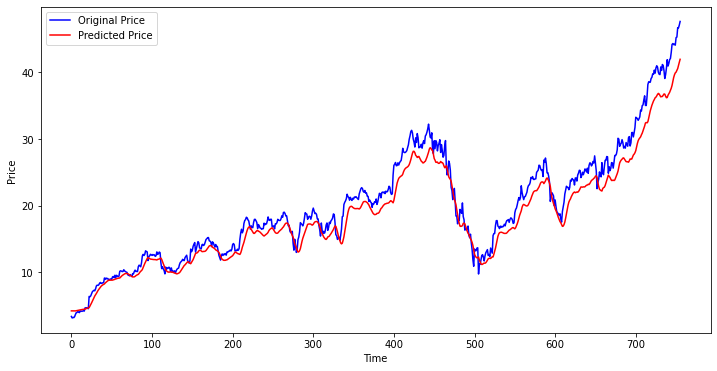

In [47]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label = 'Original Price')
plt.plot(y_predicted,'r',label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()